In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

from lib.util import *

plt.style.use("ggplot")

In [20]:
df = pd.read_json("../data/preprocessed/preprocessed.json", orient="index")
with open("../data/preprocessed/param.json", "r") as f:
    params = json.load(f)
    print("params:", params)

user_n, item_n = params["user_n"], params["item_n"]

params: {'user_n': 1096, 'item_n': 3664}


In [7]:
uplift_based_nn_model, losses, results = train(
    df=df,
    user_n=user_n,
    item_n=item_n,
    args=Args(batch_size=1000, epochs=5000, model="nn", lmda=1e-8),
)

accuracy_based_nn_model, losses, results = train(
    df=df,
    user_n=user_n,
    item_n=item_n,
    args=Args(
        batch_size=1000,
        epochs=5000,
        sampling="accuracy-based-pointwise",
        model="nn",
        lmda=1e-8,
    ),
)

uplift_based_mf_model, losses, results = train(
    df=df,
    user_n=user_n,
    item_n=item_n,
    args=Args(batch_size=1000, epochs=5000, model="mf", lmda=1e-8),
)

accuracy_based_mf_model, losses, results = train(
    df=df,
    user_n=user_n,
    item_n=item_n,
    args=Args(
        batch_size=1000,
        epochs=5000,
        sampling="accuracy-based-pointwise",
        model="mf",
        lmda=1e-8,
    ),
)

100%|██████████| 1096/1096 [00:02<00:00, 439.35it/s]


{'Accuracy@10': 0.18894422310756973, 'Uplift@10': 0.007829791943337761, 'Accuracy@30': 0.09099804305283758, 'Uplift@30': 0.03838163330018725, 'Accuracy@100': 0.03566936790923825, 'Uplift@100': 0.02874850365478556}


100%|██████████| 1096/1096 [00:02<00:00, 449.94it/s]


{'Accuracy@10': 0.18113391984359725, 'Uplift@10': -0.0029073375847569424, 'Accuracy@30': 0.091064792373566, 'Uplift@30': 0.03400320646381725, 'Accuracy@100': 0.03545747422680413, 'Uplift@100': 0.029468843837748296}


100%|██████████| 1096/1096 [00:02<00:00, 434.90it/s]


{'Accuracy@10': 0.18207452165156093, 'Uplift@10': -0.00035286689365239055, 'Accuracy@30': 0.09772205834152738, 'Uplift@30': 0.02298502469060966, 'Accuracy@100': 0.03710569105691057, 'Uplift@100': 0.029217361317205835}


100%|██████████| 1096/1096 [00:02<00:00, 413.57it/s]


{'Accuracy@10': 0.16553398058252428, 'Uplift@10': 0.046807674526121106, 'Accuracy@30': 0.08821825205214871, 'Uplift@30': 0.03275049091893744, 'Accuracy@100': 0.03547879177377892, 'Uplift@100': 0.028412897262416883}


100%|██████████| 1096/1096 [00:02<00:00, 443.03it/s]


{'Accuracy@10': 0.16739562624254473, 'Uplift@10': 0.03420705923191008, 'Accuracy@30': 0.09075794621026895, 'Uplift@30': 0.027157469514937794, 'Accuracy@100': 0.03635126377187298, 'Uplift@100': 0.030212244944588452}


100%|██████████| 1096/1096 [00:03<00:00, 339.21it/s]


{'Accuracy@10': 0.17652859960552267, 'Uplift@10': 0.05848752387213934, 'Accuracy@30': 0.10092457420924573, 'Uplift@30': 0.018640391367777537, 'Accuracy@100': 0.0471156330749354, 'Uplift@100': 0.011168072908313044}


100%|██████████| 1096/1096 [00:03<00:00, 327.07it/s]


{'Accuracy@10': 0.19651741293532338, 'Uplift@10': 0.033367290531469675, 'Accuracy@30': 0.10586797066014669, 'Uplift@30': 0.022949596752211657, 'Accuracy@100': 0.049465327284510696, 'Uplift@100': 0.012024395272011646}


100%|██████████| 1096/1096 [00:03<00:00, 323.19it/s]


{'Accuracy@10': 0.1988071570576541, 'Uplift@10': 0.04056297137808082, 'Accuracy@30': 0.10669272105520274, 'Uplift@30': 0.021145941248755313, 'Accuracy@100': 0.05044041450777202, 'Uplift@100': 0.01230240024115413}


100%|██████████| 1096/1096 [00:03<00:00, 346.97it/s]


{'Accuracy@10': 0.19605522682445758, 'Uplift@10': 0.04135045865815095, 'Accuracy@30': 0.10652703360935217, 'Uplift@30': 0.021387032333168906, 'Accuracy@100': 0.050100193923723335, 'Uplift@100': 0.011653621931411649}


100%|██████████| 1096/1096 [00:03<00:00, 336.75it/s]


{'Accuracy@10': 0.19980217606330367, 'Uplift@10': 0.03926765892641264, 'Accuracy@30': 0.10915447154471544, 'Uplift@30': 0.022686438640589085, 'Accuracy@100': 0.051397605952766094, 'Uplift@100': 0.012928338754615566}


  7%|▋         | 82/1096 [00:00<00:02, 410.52it/s]

[3316, 3312, 156, 2960, 2326, 2574, 1534, 3481, 2506, 2975, 2623, 2318, 301, 2627, 2425, 2283, 691, 1643, 1363, 1117, 725, 1953, 1598, 1999, 2289, 541, 2886, 1105, 391, 71]
[2557, 378, 2289, 71, 2243, 301, 1534, 630, 2577, 1693, 2399, 212, 2304, 3190, 725, 392, 3352, 2026, 2879, 3171, 1276, 838, 1626, 666, 1892, 1030, 917, 2262, 2494, 2618]
[2536, 212, 71, 2557, 1534, 1019, 2623, 2703, 2082, 2972, 2684, 2879, 2860, 1520, 3190, 937, 791, 1397, 1794, 1646, 895, 359, 1733, 132, 155, 457, 2960, 1311, 445, 1264]
[1534, 71, 630, 2536, 2541, 184, 440, 2304, 2557, 1488, 3521, 1843, 727, 3217, 795, 2237, 894, 557, 2495, 1585, 725, 2289, 1714, 2921, 2623, 2505, 2713, 3159, 1626, 2780]
[2536, 2571, 2623, 995, 3142, 2993, 212, 256, 2506, 3443, 2222, 753, 1044, 144, 3173, 89, 3071, 1803, 1214, 2710, 630, 931, 2318, 1270, 3423, 2739, 644, 2952, 442, 562]
[212, 1534, 2578, 937, 894, 1748, 1449, 3394, 1643, 2136, 2583, 2461, 2489, 1122, 3478, 683, 2557, 2318, 1936, 863, 3020, 2184, 2733, 77, 1532, 160

100%|██████████| 1096/1096 [00:02<00:00, 423.13it/s]


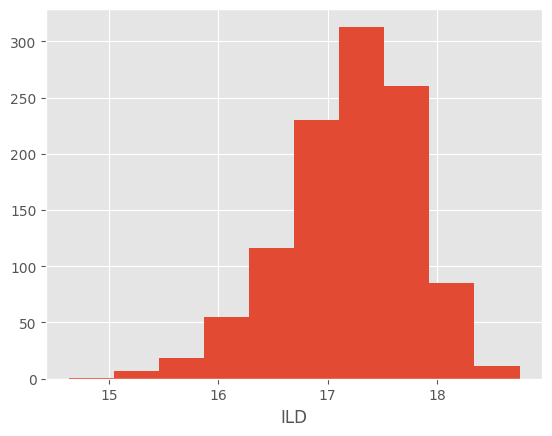

ILD: 17.20279088099216
recommended_items: 2869


  4%|▎         | 41/1096 [00:00<00:02, 408.97it/s]

[1534, 2807, 3021, 1621, 1673, 3222, 2813, 209, 791, 3151, 2318, 1192, 3377, 1427, 837, 1, 1164, 2780, 1979, 1299, 1583, 1818, 897, 2857, 592, 1955, 873, 1203, 3062, 1900]
[3426, 378, 430, 666, 2536, 1818, 814, 392, 71, 1643, 1019, 123, 1534, 2557, 3011, 2243, 301, 630, 1996, 608, 1936, 1001, 717, 238, 212, 828, 1703, 2821, 688, 514]
[212, 71, 842, 1534, 1739, 2623, 1646, 392, 1019, 133, 531, 976, 2082, 3011, 2860, 2289, 2972, 1907, 2450, 3426, 2557, 2960, 244, 828, 3443, 1693, 2527, 2536, 2202, 2669]
[3539, 71, 2623, 1948, 1534, 884, 1210, 1551, 3055, 45, 2325, 619, 639, 204, 2751, 184, 3426, 764, 2223, 1324, 2620, 1609, 581, 2762, 2776, 1481, 1061, 3498, 2972, 645]
[1044, 2623, 3661, 2473, 3173, 2536, 3423, 351, 212, 3291, 1054, 1264, 2971, 630, 3049, 1969, 2634, 2626, 2729, 3179, 937, 1996, 2665, 1739, 3443, 99, 780, 2972, 2347, 470]
[333, 2807, 3221, 2513, 24, 1400, 2496, 1739, 876, 46, 239, 1608, 805, 3292, 71, 3372, 1876, 1534, 3141, 1636, 2348, 3118, 1397, 2712, 2197, 940, 3245,

100%|██████████| 1096/1096 [00:02<00:00, 428.74it/s]


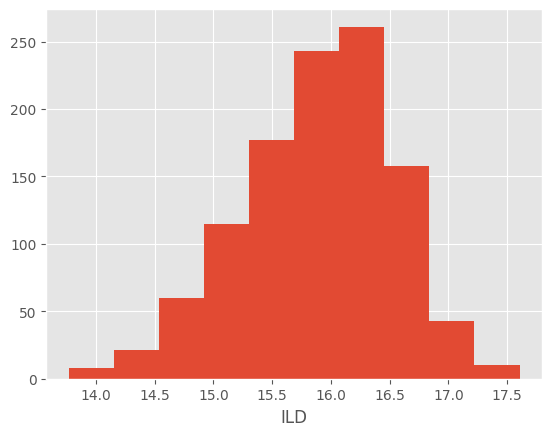

ILD: 15.891539175551017
recommended_items: 3119


  2%|▏         | 23/1096 [00:00<00:04, 227.22it/s]

[1534, 212, 71, 2557, 2972, 630, 2289, 301, 937, 1019, 1643, 2623, 1969, 2536, 2174, 392, 1276, 2780, 1087, 2489, 940, 2578, 2960, 1122, 2222, 238, 894, 1397, 2082, 1561]
[1534, 212, 2557, 71, 630, 2972, 2289, 1019, 301, 1643, 937, 2623, 1969, 2536, 1276, 392, 718, 894, 2082, 2174, 133, 1397, 2033, 1585, 3312, 2328, 455, 3316, 2266, 690]
[1534, 212, 2557, 71, 630, 1643, 1019, 301, 2289, 2972, 937, 2623, 1969, 2536, 133, 1276, 2082, 392, 718, 2033, 2960, 3312, 1397, 2174, 1585, 2578, 2266, 1087, 657, 3316]
[1534, 212, 2557, 71, 630, 1019, 2972, 1643, 2289, 301, 937, 2623, 1969, 1276, 2536, 392, 133, 2082, 1397, 2174, 2033, 3312, 718, 894, 2266, 455, 690, 2960, 2032, 1646]
[1534, 212, 2557, 71, 630, 2972, 2289, 1019, 301, 937, 1643, 1969, 2623, 2536, 1276, 392, 2174, 718, 2082, 133, 2033, 3312, 2960, 2780, 1397, 1087, 3316, 2222, 1122, 238]
[1534, 212, 2557, 71, 630, 2289, 2972, 1019, 1643, 301, 2623, 937, 1969, 2536, 392, 1276, 2960, 133, 2174, 1087, 2082, 2578, 3312, 2033, 1397, 1585, 

100%|██████████| 1096/1096 [00:04<00:00, 243.00it/s]


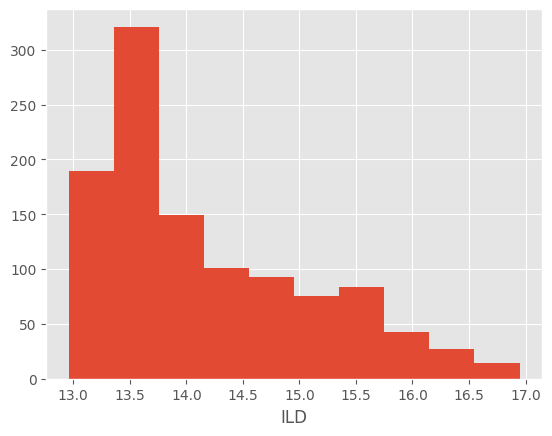

ILD: 14.170293628985782
recommended_items: 98


  2%|▏         | 22/1096 [00:00<00:04, 218.41it/s]

[1534, 2807, 1646, 71, 2557, 828, 2289, 212, 1739, 1969, 2972, 1019, 1643, 630, 2860, 2623, 238, 2536, 2222, 1276, 2780, 791, 133, 301, 3425, 6, 1188, 2174, 251, 2328]
[1534, 2557, 630, 2860, 1969, 1646, 2289, 2536, 71, 1019, 2623, 828, 212, 2807, 392, 884, 1643, 1276, 2177, 1739, 718, 2082, 2174, 301, 2243, 2960, 2972, 780, 895, 2266]
[1534, 71, 2557, 630, 2860, 1646, 2289, 2623, 828, 1969, 1739, 212, 1276, 1019, 238, 3316, 2536, 3426, 2960, 718, 301, 2972, 531, 1585, 895, 3425, 2807, 937, 401, 2494]
[1534, 2289, 1646, 2807, 212, 828, 71, 2536, 1969, 1019, 2557, 392, 723, 630, 1739, 2623, 1643, 780, 301, 251, 1276, 2222, 1585, 2972, 2860, 884, 2174, 937, 3425, 2889]
[2623, 1431, 1534, 2536, 89, 2399, 602, 2860, 2557, 630, 1053, 1054, 1646, 2289, 2792, 619, 2039, 1019, 2439, 2816, 1583, 392, 209, 1969, 828, 2266, 1844, 2174, 718, 1276]
[1534, 2807, 2222, 414, 2977, 940, 1646, 212, 442, 828, 2318, 71, 535, 1587, 2794, 3076, 879, 1689, 2289, 937, 2889, 1969, 723, 1739, 816, 1483, 1069, 2

100%|██████████| 1096/1096 [00:04<00:00, 244.54it/s]


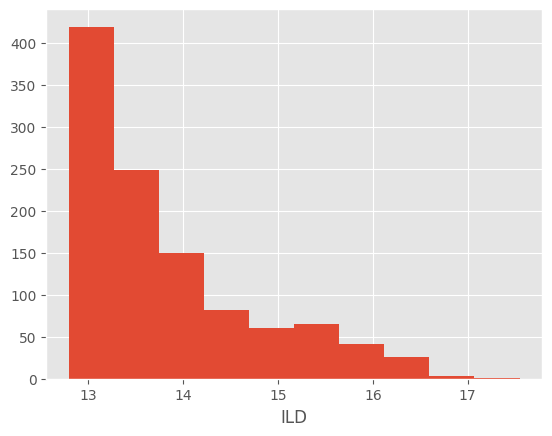

ILD: 13.822058035403085
recommended_items: 1148


In [17]:
k = 30

for model in [
    uplift_based_mf_model,
    accuracy_based_mf_model,
    uplift_based_nn_model,
    accuracy_based_nn_model,
]:
    model.eval()
    s = []
    rec_item_set = set()

    embeddings = (
        accuracy_based_nn_model.item_embedding.forward(torch.arange(item_n))
        .cpu()
        .detach()
        .numpy()
    )
    for u in tqdm.tqdm(range(user_n)):
        y = model.forward(
            u=torch.LongTensor([u] * item_n),
            i=torch.arange(item_n),
        )
        rec_list = y.argsort().cpu().detach().numpy()[::-1][:k].tolist()

        if u < 10:
            print(rec_list)
        rec_item_set |= set(rec_list)

        d = 0
        for i in rec_list:
            for j in rec_list:
                d += np.linalg.norm(embeddings[i] - embeddings[j])
        d /= k * k
        s.append(d)

    plt.hist(s)
    plt.xlabel("ILD")
    plt.show()
    print("ILD:", sum(s) / len(s))
    print("recommended_items:", len(rec_item_set))